# OpenAI gym

O OpenAI gym é uma biblioteca de ambientes de aprendizado por reforço projetada para desenvolvimento e benchmarking de algoritmos de Aprendizado por Reforço. Neste código vamos fazer uso do ambiente 'Roulette-v0' (https://gym.openai.com/envs/Roulette-v0/).

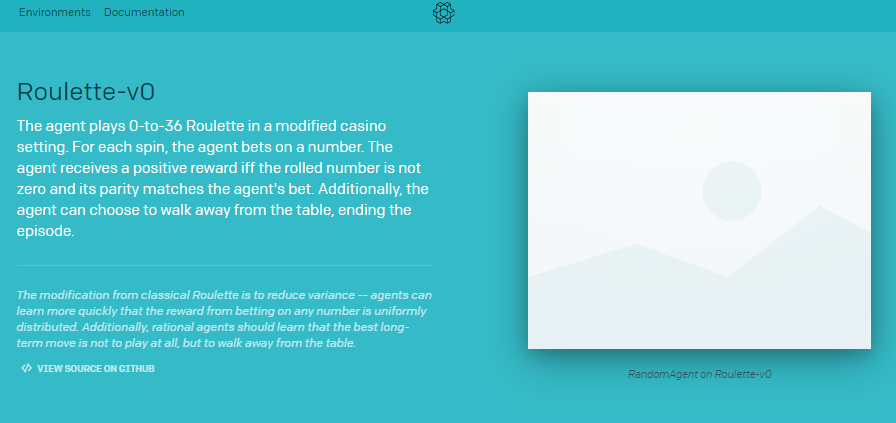

O código da biblioteca é aberto e pode ser encontrado em https://github.com/openai/gym/blob/master/gym/envs/toy_text/roulette.py.

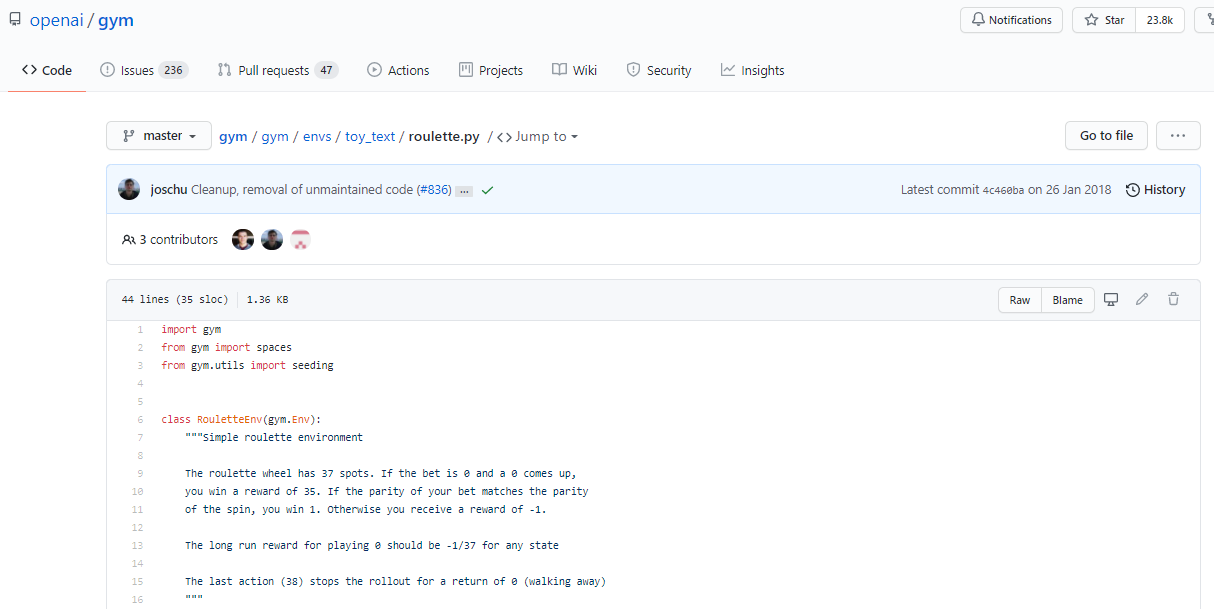

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

## Create Environment

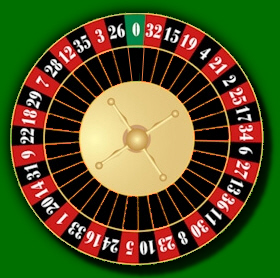

In [ ]:
env = gym.make('Roulette-v0')

print('Observation Space:')
print(env.observation_space)
print('Action Space:')
print(env.action_space)


Observation Space:
Discrete(1)
Action Space:
Discrete(38)


In [ ]:
ACTION_SPACE = list(np.arange(env.action_space.n))
GAMMA = 0.95
MAX_T_PER_EPISODE = 1000

### Test Environment

In [ ]:
s = env.reset()
print('s0 = ' + str(s))

a = env.action_space.sample()
print('a = ' + str(a))
s_next, r, done, _ = env.step(a)
print('s_next = ' + str(s_next))
print('r = ' + str(r))
print('done = ' + str(done))


s0 = 0
a = 19
s_next = 0
r = -1.0
done = False


## Agent Class

In [ ]:
#--------------------------------------------
# Agent
# PROPERTIES:
# policy: Numpy array representing agent's policy 
#         (shape = (m), where m = len(action_space))
#
# METHODS:
# __init__: Class default constructor
# get_action: Apply policy to obtain action given current state.
class Agent:
    def __init__(self, policy):
        self.policy = policy
    
    def get_action(self):
        # Obtain distribution of action probabilities from policy
        probabilities = self.policy
        # get action index
        a_index = np.random.choice(ACTION_SPACE,p=probabilities)
        # get action
        action = ACTION_SPACE[a_index]

        return action

### Create Random Agent

In [ ]:
random_policy = (1/env.action_space.n)*np.ones(env.action_space.n)
print('Random Policy = ')
print(random_policy)

Random Policy = 
[0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579 0.02631579
 0.02631579 0.02631579]


In [ ]:
random_agent = Agent(random_policy)

In [105]:
print(random_agent.get_action())

17


## Transition Class

In [ ]:
class Transition():
    def __init__(self,s,a,r,s_next,done):
        self.s = s
        self.a = a
        self.r = r
        self.s_next = s_next
        self.done = done

## Generate Episode

In [ ]:
#------------------------------------------------------------------------------
# generate_episode(env, agent)
#
# INPUT:
# env: Environment (GridWorld object).
# agent: Object of class Agent.
#
# OUTPUT:
# episde: List of Transition objects.
#------------------------------------------------------------------------------
def generate_episode(env, agent):
    episode = []
    # Initialize state
    s = env.reset()
    # Main Episode Loop
    done = False
    for t in range(0, MAX_T_PER_EPISODE):
        # Get action from agent
        a = agent.get_action()
        # Execute action and observe next state and reward
        s_next, r, done, _ = env.step(a)
        # Store transition
        t = Transition(s,a,r,s_next,done)
        episode.append(t)
        # Evolve state
        s = s_next
        # Check if agent left roulette table
        if (done):
            break
    
    return episode



In [ ]:
episode = generate_episode(env, random_agent)

## Plot Episode

In [ ]:
def plot_episode(episode):
    for i in range(len(episode)):
        print('-------------------------')
        print('a = ' + str(episode[i].a))
        print('r = ' + str(episode[i].r))
    
    rewards = [t.r for t in episode]
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(rewards, lw=2)
    fig.suptitle('Episode Rewards')
    ax.set_xlabel('Timestep t')
    ax.set_ylabel('Reward r')
    print('Average Reward = ' + str(np.mean(rewards)))

-------------------------
a = 6
r = 1.0
-------------------------
a = 4
r = 1.0
-------------------------
a = 23
r = -1.0
-------------------------
a = 23
r = 1.0
-------------------------
a = 17
r = 1.0
-------------------------
a = 14
r = -1.0
-------------------------
a = 5
r = -1.0
-------------------------
a = 22
r = 1.0
-------------------------
a = 25
r = 1.0
-------------------------
a = 20
r = -1.0
-------------------------
a = 34
r = 1.0
-------------------------
a = 16
r = 1.0
-------------------------
a = 18
r = 1.0
-------------------------
a = 14
r = -1.0
-------------------------
a = 13
r = 1.0
-------------------------
a = 12
r = 1.0
-------------------------
a = 9
r = -1.0
-------------------------
a = 4
r = -1.0
-------------------------
a = 9
r = -1.0
-------------------------
a = 19
r = -1.0
-------------------------
a = 5
r = 1.0
-------------------------
a = 13
r = 1.0
-------------------------
a = 26
r = -1.0
-------------------------
a = 3
r = 1.0
--------------

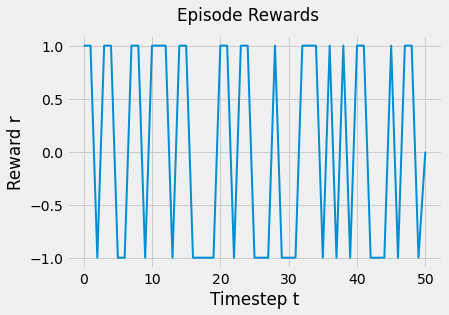

In [ ]:
plot_episode(episode)

## Monte-Carlo Policy Evaluation for Q(s,a)

In [ ]:
def monte_carlo_policy_evaluation(env,agent,N_eps=1000):
    m = env.action_space.n
    # Initialize Sum of Returns S and State Visit Count N
    S = np.zeros(m)
    N = np.zeros(m)
    # Loop over episodes
    for i in range(N_eps):
        if(i%1000 == 0):
            print(i)
        episode = generate_episode(env,random_agent)
        G = 0
        T = len(episode)
        # Loop over timesteps on episode
        for t in range(T-1,-1,-1):
            transition = episode[t]
            G = GAMMA*G + transition.r
            a_index = transition.a
            N[a_index] += 1
            S[a_index] += G
    
    # Value Function Estimate Q ~ S/N
    Q = S/N
    return Q

In [ ]:
Q = monte_carlo_policy_evaluation(env,random_agent,N_eps=100000)
print(Q)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
[-0.33252505 -0.34590664 -0.36488177 -0.3452712  -0.3132401  -0.34710978
 -0.32950136 -0.33023596 -0.33473923 -0.32872122 -0.35089337 -0.32843427
 -0.34685616 -0.3480621  -0.34528955 -0.32739891 -0.32859857 -0.32193116
 -0.32072228 -0.34929704 -0.34020819 -0.34860693 -0.34086201 -0.3590554
 -0.34584338 -0.35396065 -0.3248895  -0.35331473 -0.31449906 -0.32397044
 -0.33452212 -0.33861723 -0.32827978 -0.35124296 

## plot_Q_values(Q)

In [91]:
def plot_Q_values(Q):
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(Q,lw=2)
    fig.suptitle('State-Action Value Function $Q_{\pi}(s,a)$')
    ax.set_xlabel('Action a')
    ax.set_ylabel('$Q_{\pi}(s,a)$')

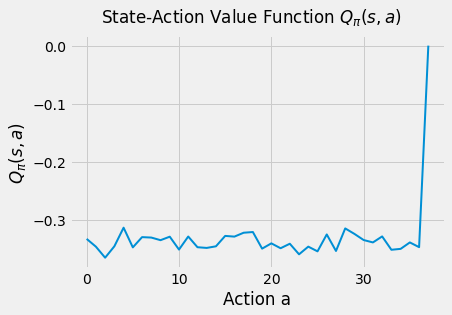

In [92]:
plot_Q_values(Q)